In [1]:
from collections import Counter
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('petrol_consumption.csv')

In [3]:
dataset.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [4]:
dataset.shape

(48, 5)

In [5]:
print(dataset.info())
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB
None


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


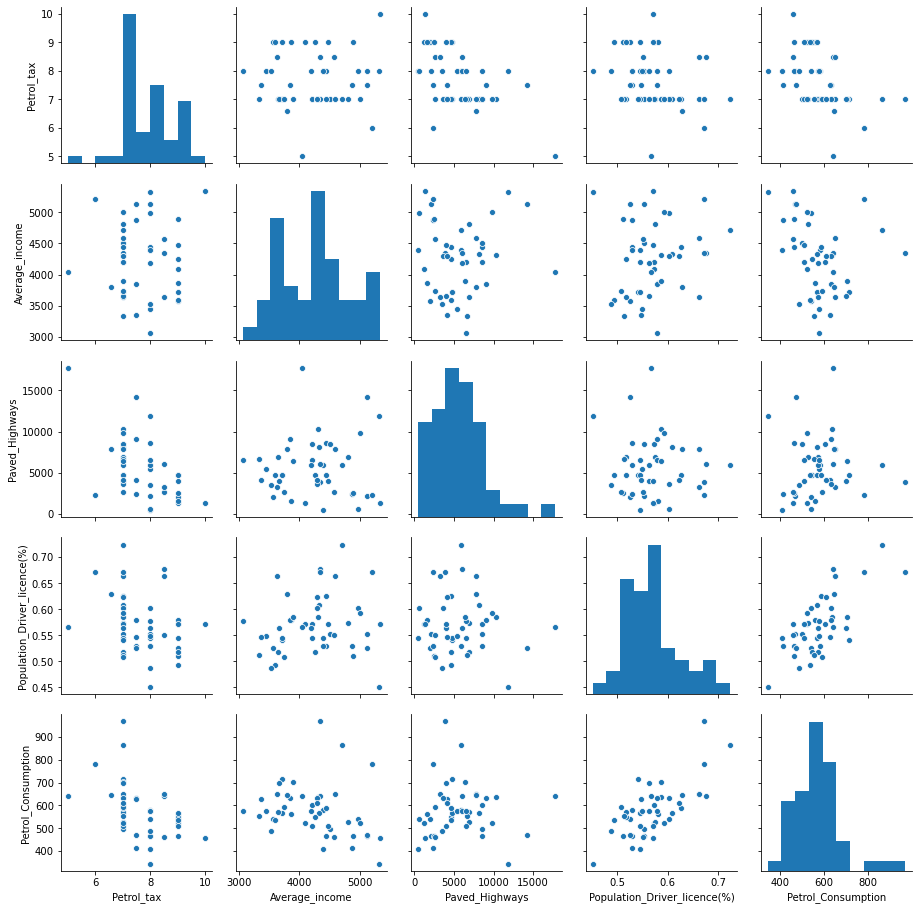

In [6]:
sns.pairplot(dataset)

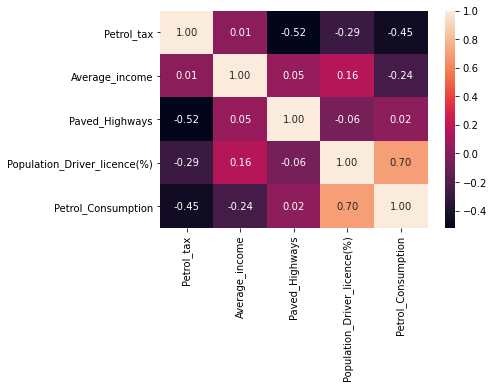

In [7]:
sns.heatmap(dataset.corr(), annot=True, fmt=".2f")
plt.show()

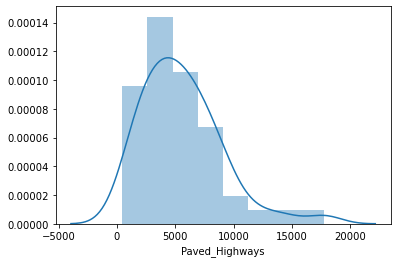

In [8]:
sns.distplot(dataset['Paved_Highways'])

In [9]:
# X = dataset[['Petrol_tax', 'Paved_Highways', 'Average_income',
#              'Population_Driver_licence(%)']]  # 'Petrol_tax','Paved_Highways'

X = dataset[['Petrol_tax', 'Average_income',
             'Population_Driver_licence(%)']]  # 'Petrol_tax','Paved_Highways'
y = dataset['Petrol_Consumption']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=920)

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-35.584959
Average_income,-0.069994
Population_Driver_licence(%),1449.995058


In [13]:
regressor.intercept_

324.7721334199865

In [14]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
11,471,460.340726
47,524,585.412183
36,640,684.416936
2,561,574.976033
43,591,550.145643
37,704,652.606099
9,498,560.259673
17,714,598.435336
38,648,729.216829
10,580,501.244152


Text(0, 0.5, 'Residuals')

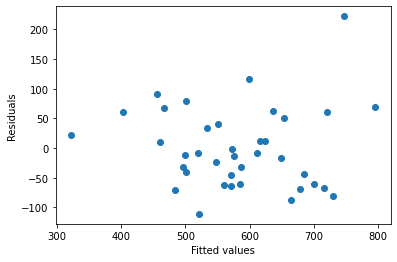

In [15]:
# Validating OLS Assumptions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

In [16]:
(y_train-y_pred).mean()

2.5729126431734153e-13

Text(0.5, 0, 'Residuals')

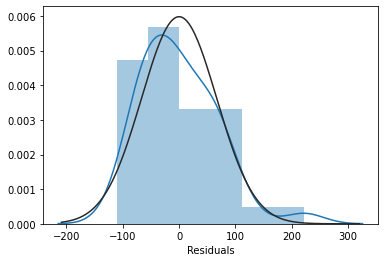

In [17]:
sns.distplot(y_train-y_pred, fit=norm)
plt.xlabel('Residuals')

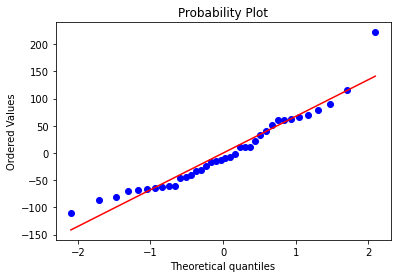

In [18]:
from scipy import stats
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [19]:
import statsmodels.api as sm

In [20]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)
X_endog1 = sm.add_constant(X_test)

In [21]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [22]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     25.58
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           7.66e-09
Time:                        19:31:18   Log-Likelihood:                -213.53
No. Observations:                  38   AIC:                             435.1
Df Residuals:                      34   BIC:                             441.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          324.7721    186.126      1.745      0.090     -53.482     703.026
Petrol_tax                     -35.5850     12.805     -2.779      0.009     -61.607      -9.563
Average_income                  -0.0700      0.021     -3.308      0.002      -0.113      -0.027
Population_Driver_licence(%)  1449.9951    202.210      7.171      0.000    1039.056    1860.934
==============================================================================
Omnibus:                        9.086   Durbin-Watson:                   2.596
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.030
Skew:                           0.934   Prob(JB):                       0.0180
Kurtosis:                       4.259   Cond. No.                     9.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Model evaluation metrics - Regression problems

from sklearn import metrics
y_pred1 = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 39.4982214869721
Mean Squared Error: 2656.938639675864
Root Mean Squared Error: 51.545500673442525


In [24]:
# Build a model keeping in mind the individual t tests

In [26]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    '''MAPE function'''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('Mean Absolute % Error:', mean_absolute_percentage_error(y_test, y_pred1))

Mean Absolute % Error: 6.958644527916599
